In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Preprocessing

In [6]:
#Droping unwanted columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Converting categorical variable into numerical variable
label_encoder_gender = LabelEncoder()  #one of the encoding techniques with respect to categorical variables
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.shape

(10000, 11)

In [9]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder #use to perfor the one Hot encoding

#creating a variable for the one hot encoding
onehot_encoder_geo = OneHotEncoder()

#Applying the one hot encoder on the 'Geography' column
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [10]:
#Checking the new feature names from the geography column
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [11]:
#Putting the values in a Dataframe format 
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [12]:
## Combining one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [13]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [14]:
# Reordering the columns and moving 'Exited' column to the end
columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
           'Geography_Germany', 'Geography_Spain', 'Exited']


data = data[columns[:-1] + ['Exited']]  

In [15]:
data.to_csv('clean_data.csv', index=False)

In [16]:
## Save the encoders and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


In [17]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0


In [18]:
## Dividing the dataset into indepent and dependent features
x = data.drop('Exited',axis=1)
y = data['Exited']

In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
scaler = StandardScaler()


In [21]:
#Fitting and transforming the 'x' data into the scaler to be in a common range
#standardized_data = scaler.fit_transform(x)

In [22]:
data['Dependents'] = data['Exited'].astype(int)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state= 2)

In [24]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train_scaled

array([[ 0.60721946,  0.91532126, -1.52048135, ..., -1.00125078,
         1.73668197, -0.57792762],
       [ 0.223985  ,  0.91532126,  2.76310098, ..., -1.00125078,
         1.73668197, -0.57792762],
       [ 0.00647356,  0.91532126, -0.47338344, ..., -1.00125078,
         1.73668197, -0.57792762],
       ...,
       [-1.31931051,  0.91532126,  2.28714739, ..., -1.00125078,
         1.73668197, -0.57792762],
       [-0.73927998,  0.91532126, -0.18781129, ..., -1.00125078,
        -0.57581067,  1.73032049],
       [-1.78540647, -1.09251259, -0.28300201, ..., -1.00125078,
        -0.57581067,  1.73032049]])

In [26]:
x_test_scaled

array([[ 1.10438849, -1.09251259,  0.95447733, ...,  0.99875078,
        -0.57581067, -0.57792762],
       [ 0.29648882, -1.09251259,  0.38333302, ...,  0.99875078,
        -0.57581067, -0.57792762],
       [ 1.42547681,  0.91532126,  1.52562164, ...,  0.99875078,
        -0.57581067, -0.57792762],
       ...,
       [ 1.1768923 ,  0.91532126, -1.42529063, ...,  0.99875078,
        -0.57581067, -0.57792762],
       [ 0.50364258, -1.09251259, -0.7589556 , ..., -1.00125078,
         1.73668197, -0.57792762],
       [ 0.29648882, -1.09251259, -1.04452775, ..., -1.00125078,
        -0.57581067,  1.73032049]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(max_iter=10000)

In [29]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
#x_train model accuracy
#X_train accuracy

x_train_prediction = model.predict(x_train_scaled)

In [31]:
x_train_scaled_accuracy = accuracy_score(x_train_prediction, y_train)
print(x_train_scaled_accuracy)

0.791375


In [32]:
#x_test model accuracy
#X_test accuracy

x_test_prediction = model.predict(x_test_scaled)
x_test_scaled_accuracy = accuracy_score(x_test_prediction, y_test)
print(x_test_scaled_accuracy)

0.782


In [33]:
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt

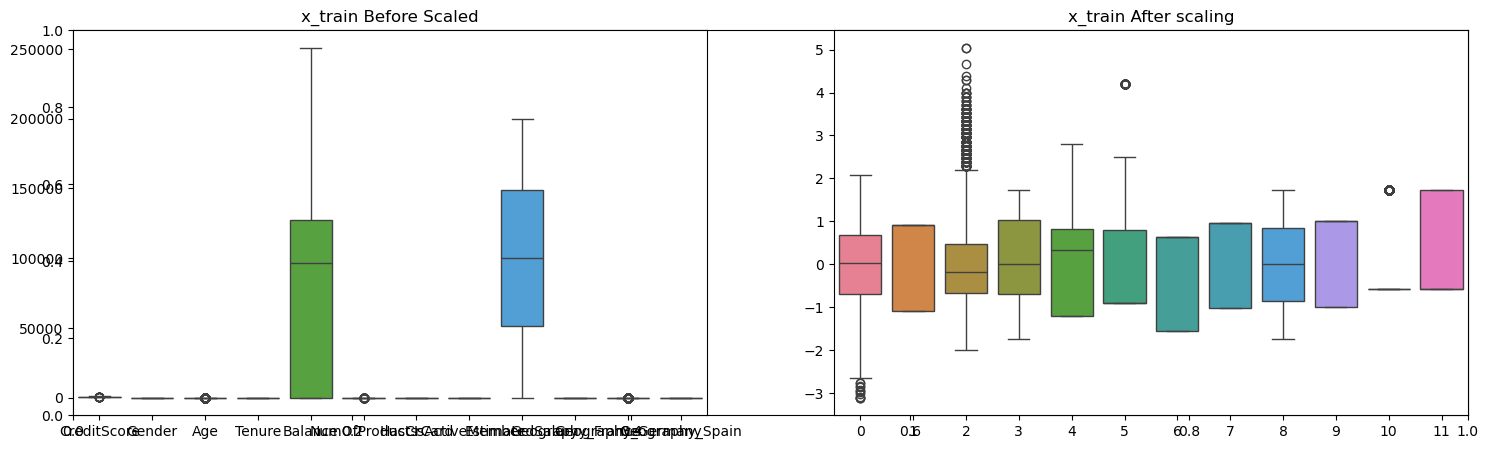

In [35]:
plt.subplots(figsize = (18, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = x_train)
plt.title('x_train Before Scaled')

plt.subplot(1, 2, 2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train After scaling')
plt.show()

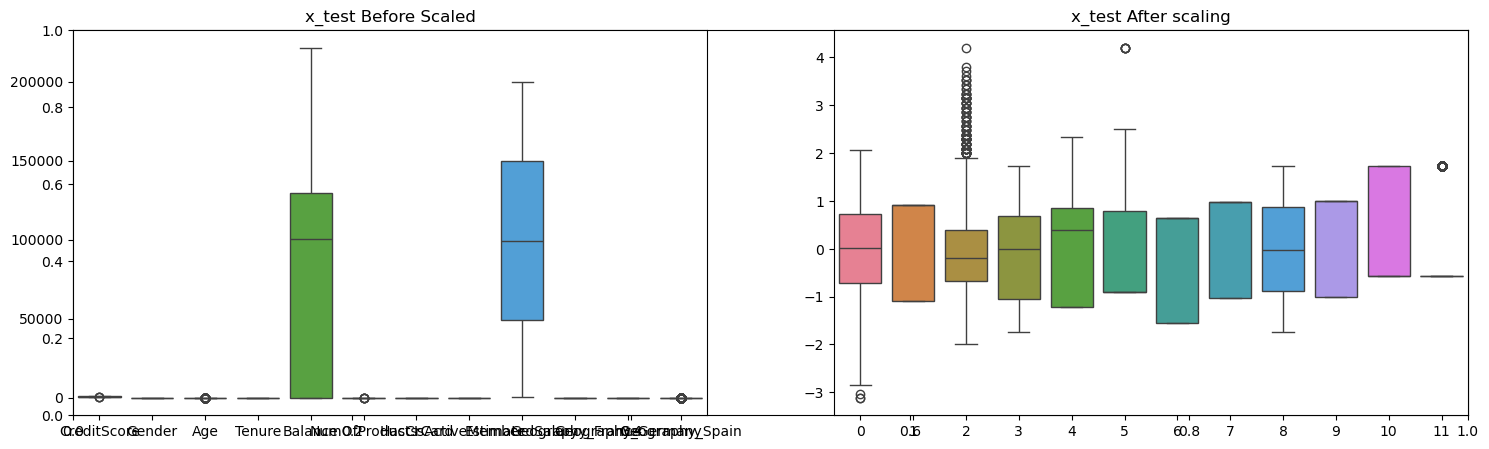

In [36]:
plt.subplots(figsize = (18, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = x_test)
plt.title('x_test Before Scaled')

plt.subplot(1, 2, 2)
sns.boxplot(data = x_test_scaled)
plt.title('x_test After scaling')
plt.show()


In [37]:
import numpy as np

In [38]:
#Making a predictive system
input_data = (502,0,42,8,159660.8,3,1,0,113931.57,1.0,0.0,0.0)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

prediction = model.predict(reshape_input_data)
print(prediction)

if prediction==1:
    print("The customer is likely to churn.")
else:
    print('The customer is not likely to churn')


[0]
The customer is not likely to churn


In [39]:
#Making a predictive system
input_data = (608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0)

#Changing the input data to numpy arrray since the processing is more efficient
convert_data_to_numpy = np.asarray(input_data)

#reshaping the array as we are predicting for one data point
#parameter for reshaping ==> '.reshape(1, -1)'
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

prediction = model.predict(reshape_input_data)
print(prediction)

if prediction==1:
    print("The customer is likely to churn.")
else:
    print('The customer is not likely to churn')


[0]
The customer is not likely to churn
